# Compare predictions

In this notebook we want to compare predictions of different models. Since the type of predictions are different, first we convert them to survival functions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
test = pd.read_csv('../../data/main_process_preprocessed_data_test.csv')
test.index = test.id

# tmp
predictions_drsa = pd.read_csv('../../../tesi_tmp/data/full_predictions_drsa.csv')
#predictions_drsa = pd.read_csv('../../data/full_predictions_drsa.csv')
predictions_deephit = pd.read_csv('../../data/full_predictions_deephit.csv')
predictions_cox = pd.read_csv('../../data/full_predictions_cox.csv')

year_max_drsa = 20
year_max_deephit = 10
year_max_cox = 7

In [3]:
predictions_drsa.shape

(1362, 366)

## Convert predictions to survivorship

We want to compute the survival function $S(t) = P(T>t) = 1 - P(T \leq t)$, being $T$ the survival time. 

Since in **DRSA** we have a discrete time and predictions for $h(t) = P(T=t|T>t-1)$  and since

$P(T > t) = P(T \neq 0,..., T \neq t) = \prod_{k\leq t} P(T \neq k| T > k-1) = \prod_{k\leq t} (1 - P(T = k| T > k-1))$

we have that $S(t) = \prod_{k\leq t} (1 - h(k))$.

In [4]:
predictions_drsa.index = predictions_drsa.id
predictions_drsa = predictions_drsa.drop(columns = 'id')
# convert to survivorship
surv_drsa = (1-predictions_drsa).cumprod(axis = 1)

surv_drsa.head()

0         1         2         3         4         5  \
id                                                                     
10013995  0.964631  0.950477  0.938768  0.926294  0.912687  0.898227   
10026243  0.976289  0.969793  0.965256  0.960767  0.956127  0.951402   
10039319  0.974815  0.967752  0.962684  0.957564  0.952198  0.946686   
10043504  0.968856  0.958280  0.950162  0.941750  0.932758  0.923385   
10044738  0.980866  0.976323  0.973217  0.970170  0.967059  0.963916   

                 6         7         8         9  ...           355  \
id                                                ...                 
10013995  0.883229  0.867922  0.852466  0.836976  ...  9.039520e-18   
10026243  0.946642  0.941864  0.937070  0.932257  ...  5.045182e-11   
10039319  0.941109  0.935499  0.929864  0.924205  ...  2.567383e-11   
10043504  0.913819  0.904164  0.894464  0.884739  ...  3.474920e-15   
10044738  0.960761  0.957596  0.954419  0.951224  ...  8.799398e-10   

                   356           357           358           359  \
id                                                                 
10013995  7.619306e-18  6.422132e-18  5.412994e-18  4.562377e-18   
10026243  4.521772e-11  4.052578e-11  3.631994e-11  3.254992e-11   
10039319  2.304654e-11  2.068721e-11  1.856861e-11  1.666627e-11   
10043504  2.976244e-15  2.549026e-15  2.183056e-15  1.869572e-15   
10044738  7.930700e-10  7.133607e-10  6.414022e-10  5.766186e-10   

                   360           361           362           363           364  
id                                                                              
10013995  3.845393e-18  3.241057e-18  2.731676e-18  2.302337e-18  1.940465e-18  
10026243  2.917064e-11  2.614166e-11  2.342674e-11  2.099335e-11  1.881230e-11  
10039319  1.495819e-11  1.342461e-11  1.204775e-11  1.081166e-11  9.701989e-12  
10043504  1.601062e-15  1.371084e-15  1.174116e-15  1.005425e-15  8.609567e-16  
10044738  5.183195e-10  4.658659e-10  4.186787e-10  3.762352e-10  3.380636e-10  

[5 rows x 365 columns]

Instead, in **DEEPHIT** we have predictions for $f(t) = P(T=t)$. Then we can easily find

$S(t) = P(T >t) = 1 - P(T \leq t) =  1 - \sum_{k\leq t} P(T = k) = 1 - \sum_{k\leq t} f(k)$

In [5]:
predictions_deephit.index = predictions_drsa.index
surv_deephit = 1- predictions_deephit.cumsum(axis = 1)
surv_deephit.head()

0         1         2         3         4         5  \
id                                                                     
10013995  0.983587  0.968989  0.950905  0.932714  0.917829  0.899328   
10026243  0.993977  0.987422  0.977602  0.970277  0.959865  0.950992   
10039319  0.993285  0.987006  0.978084  0.970286  0.960447  0.952105   
10043504  0.990916  0.982593  0.971458  0.961153  0.950000  0.938939   
10044738  0.995627  0.991055  0.983734  0.978275  0.969584  0.963506   

                 6         7         8         9  ...        50        51  \
id                                                ...                       
10013995  0.881547  0.866519  0.850342  0.831773  ...  0.153142  0.136107   
10026243  0.939714  0.929318  0.919400  0.909685  ...  0.233661  0.207745   
10039319  0.941616  0.931679  0.922747  0.913126  ...  0.233494  0.207494   
10043504  0.926578  0.915409  0.904552  0.892313  ...  0.210144  0.186947   
10044738  0.954490  0.945624  0.938193  0.931104  ...  0.258206  0.229473   

                52        53        54        55        56        57  \
id                                                                     
10013995  0.119163  0.101617  0.084869  0.067774  0.050336  0.033565   
10026243  0.181127  0.153687  0.128596  0.102809  0.076360  0.051582   
10039319  0.180945  0.153143  0.127888  0.102052  0.075384  0.051070   
10043504  0.163149  0.138385  0.115584  0.092334  0.068372  0.046178   
10044738  0.200252  0.169671  0.141808  0.113116  0.083661  0.056728   

                58            59  
id                                
10013995  0.016829 -2.400000e-08  
10026243  0.026004  5.820000e-08  
10039319  0.025463 -3.400000e-09  
10043504  0.023173 -5.600000e-09  
10044738  0.028345 -4.220000e-08  

[5 rows x 60 columns]

For the **COX** model we already built survivorship predictions (but on a much more refined time grid).

In [6]:
predictions_cox = predictions_cox.transpose()
predictions_cox.index = predictions_drsa.index

surv_cox = predictions_cox
surv_cox.head()

0         1         2         3         4         5     \
id                                                                     
10013995  0.999335  0.999335  0.999335  0.999335  0.999335  0.999002   
10026243  0.999868  0.999868  0.999868  0.999868  0.999868  0.999802   
10039319  0.999873  0.999873  0.999873  0.999873  0.999873  0.999809   
10043504  0.999650  0.999650  0.999650  0.999650  0.999650  0.999475   
10044738  0.999953  0.999953  0.999953  0.999953  0.999953  0.999930   

              6         7         8         9     ...      1578      1579  \
id                                                ...                       
10013995  0.998335  0.998335  0.998002  0.997335  ...  0.482842  0.482842   
10026243  0.999670  0.999670  0.999604  0.999471  ...  0.865648  0.865648   
10039319  0.999681  0.999681  0.999617  0.999489  ...  0.869781  0.869781   
10043504  0.999124  0.999124  0.998949  0.998598  ...  0.681964  0.681964   
10044738  0.999883  0.999883  0.999860  0.999813  ...  0.950312  0.950312   

              1580      1581      1582      1583      1584      1585  \
id                                                                     
10013995  0.482842  0.482842  0.482842  0.482842  0.482842  0.482842   
10026243  0.865648  0.865648  0.865648  0.865648  0.865648  0.865648   
10039319  0.869781  0.869781  0.869781  0.869781  0.869781  0.869781   
10043504  0.681964  0.681964  0.681964  0.681964  0.681964  0.681964   
10044738  0.950312  0.950312  0.950312  0.950312  0.950312  0.950312   

              1586      1587  
id                            
10013995  0.482842  0.482842  
10026243  0.865648  0.865648  
10039319  0.869781  0.869781  
10043504  0.681964  0.681964  
10044738  0.950312  0.950312  

[5 rows x 1588 columns]

# Plot sample of patients

In [7]:
# set time for plots
drsa_time = np.arange(1,len(predictions_drsa.columns)+1)/len(predictions_drsa.columns)*year_max_drsa
deephit_time = np.arange(1,len(predictions_deephit.columns)+1)/len(predictions_deephit.columns)*year_max_deephit
cox_time = predictions_cox.columns/len(predictions_cox.columns)*year_max_cox

## observe non proportionality in DRSA

In [8]:
sample_ids = np.random.choice(test.id, size = 500, replace = False)
time_threshold = 5

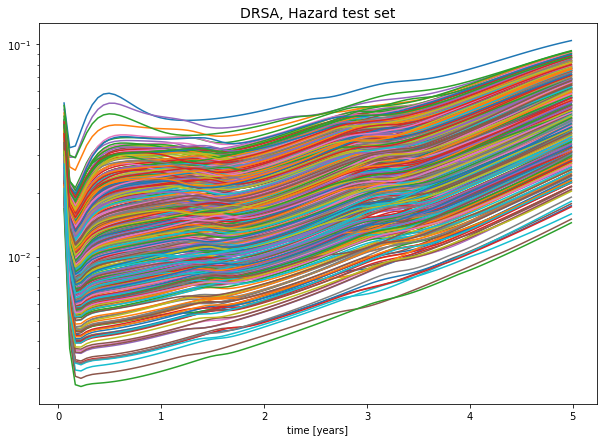

In [9]:

time_threshold = 5
time_min = 0

# DRSA - Hazard
plt.figure(figsize = (10,7))
for i in sample_ids:
    plt.plot(drsa_time[(drsa_time >= time_min) & (drsa_time < time_threshold)],predictions_drsa.loc[i,:][(drsa_time >= time_min) & (drsa_time < time_threshold)],
             alpha = 1,
            )
    
plt.xlabel('time [years]')
plt.title('DRSA, Hazard test set',size = 14)
plt.yscale('log')
plt.show()

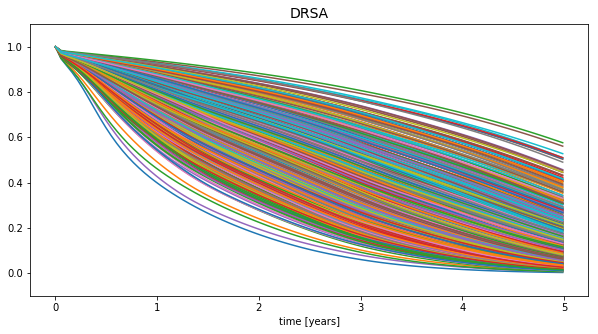

In [10]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]))
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.ylim(-0.1,1.1)
plt.show()

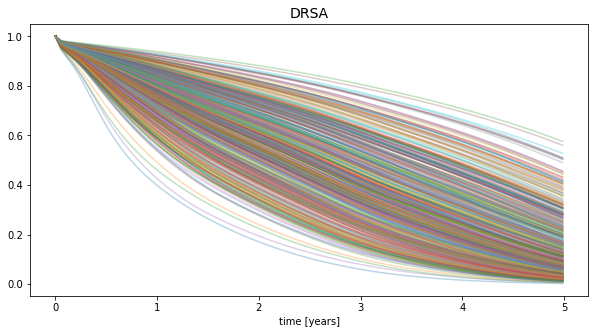

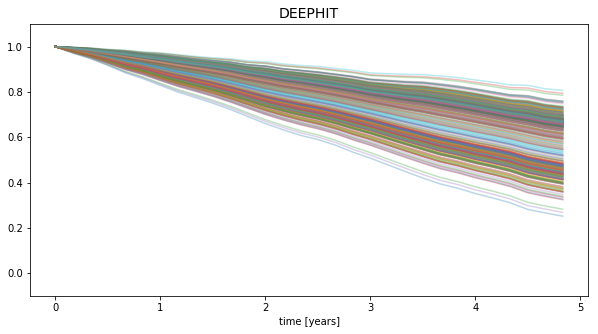

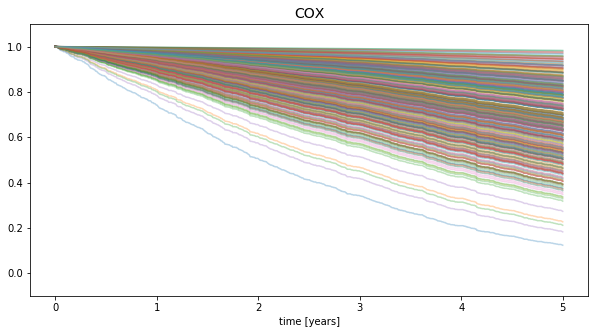

In [11]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]),alpha = 0.3)
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]),alpha = 0.3)
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold],alpha = 0.3)
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.show()

Let's compare the original predictions on the same sample

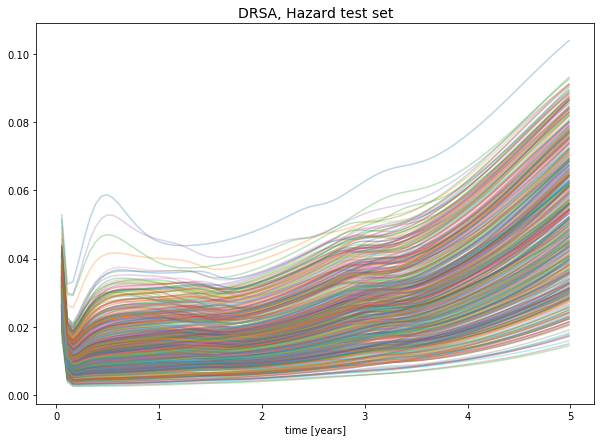

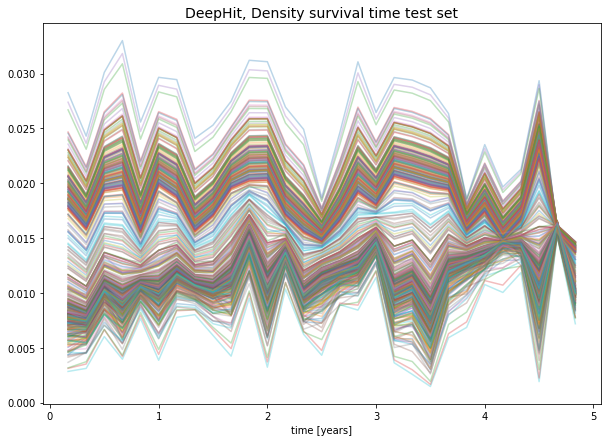

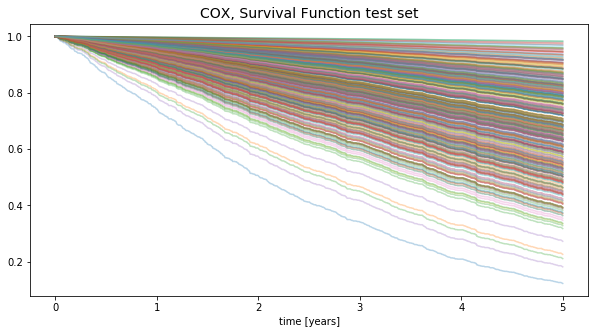

In [12]:
# DRSA
plt.figure(figsize = (10,7))
for i in sample_ids:
    plt.plot(drsa_time[drsa_time < time_threshold],predictions_drsa.loc[i,:][drsa_time < time_threshold],alpha = 0.3)
    
plt.xlabel('time [years]')
plt.title('DRSA, Hazard test set',size = 14)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,7))
for i in sample_ids:
    plt.plot(deephit_time[deephit_time < time_threshold],predictions_deephit.loc[i,:][deephit_time < time_threshold],alpha = 0.3)
    
plt.xlabel('time [years]')
plt.title('DeepHit, Density survival time test set',size = 14)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold],alpha = 0.3)
plt.xlabel('time [years]')
plt.title('COX, Survival Function test set',size = 14)
plt.show()

# Males vs Females

In [13]:
colors = ['fuchsia','dodgerblue']
col = {'F':colors[0],'M':colors[1]}

# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Females', 'Males']

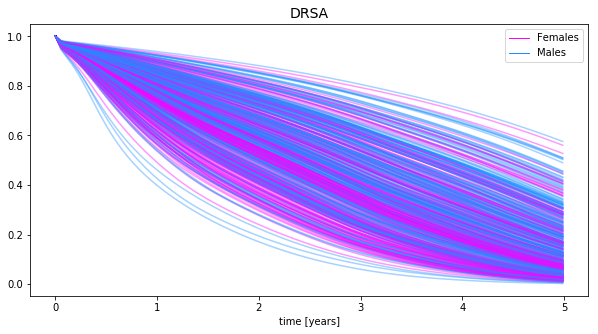

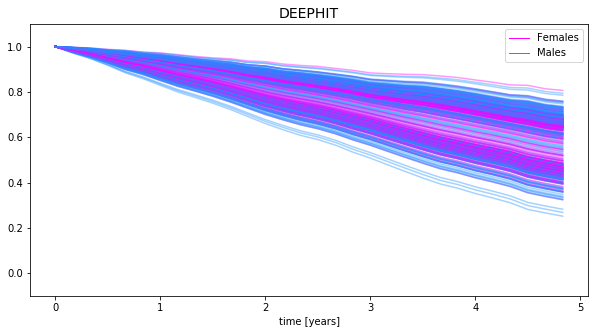

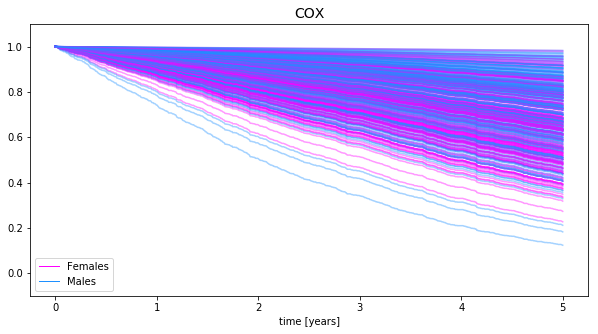

In [14]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col[test.loc[i,'sex']],
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col[test.loc[i,'sex']],
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col[test.loc[i,'sex']],
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# Age

In [15]:
def col(x):
    return 'blue' if x <75 else 'red'

colors = ['blue','red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Under 75', 'Over 75']

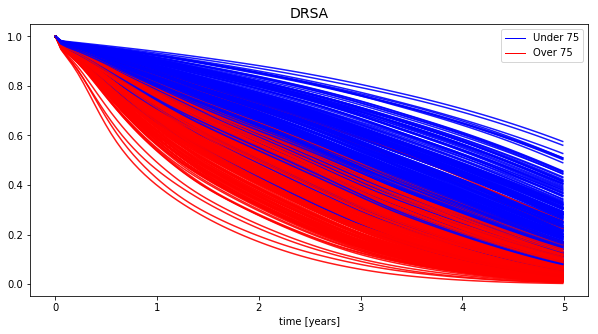

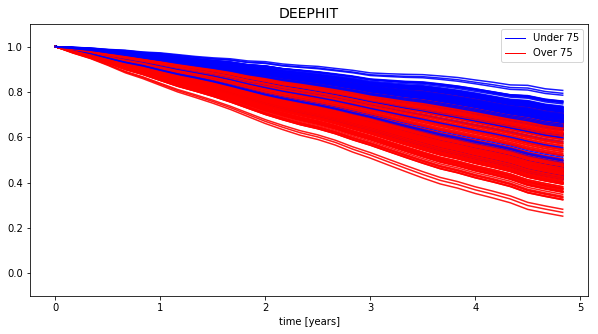

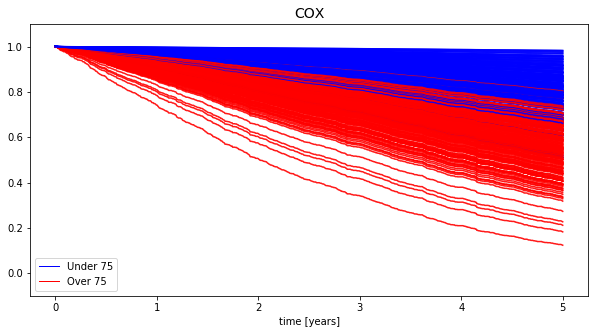

In [16]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,'age_in']),
             alpha = 0.9,
            )
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,'age_in']),
             alpha = 0.9,
            )
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,'age_in']),
             alpha = 0.9,
            )
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# More cases

In [17]:
def col(x):
    if x['sex'] == 'F' and x['age_in'] > 75:
        return 'fuchsia'
    elif x['sex'] == 'F' and x['age_in'] < 75:
        return 'red'
    elif x['sex'] == 'M' and x['age_in'] > 75:
        return 'blue'
    else:
        return 'aqua'

colors = ['fuchsia','red','blue','aqua']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Female Over 75', 'Female Under 75', 'Male Over 75', 'Male Under 75']

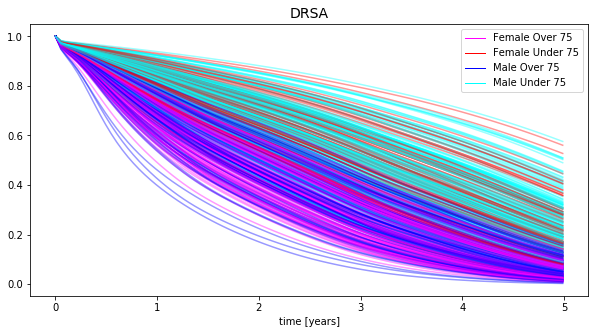

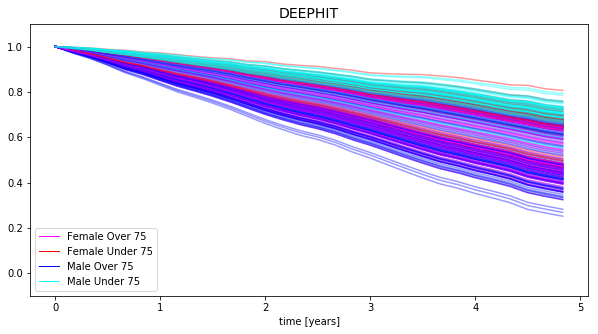

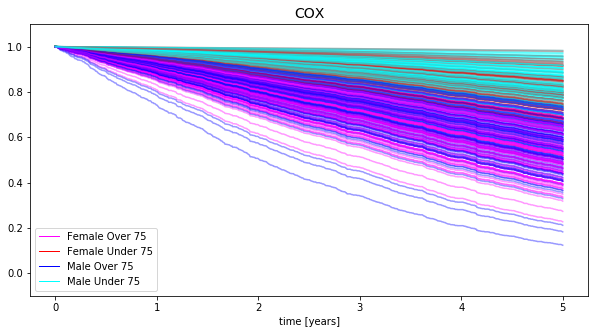

In [18]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

In [19]:
def col(x):
    return 'red' if x['sex'] == 'F' and x['age_in'] > 75 else 'grey'

colors = ['red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Female Over 75']

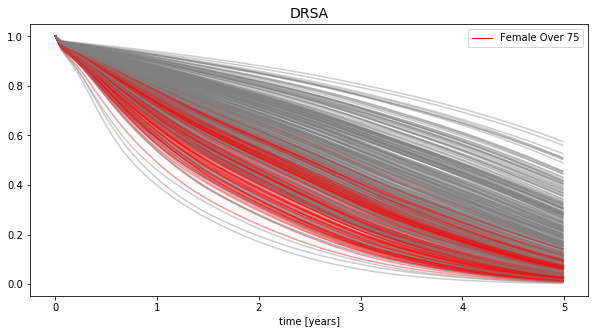

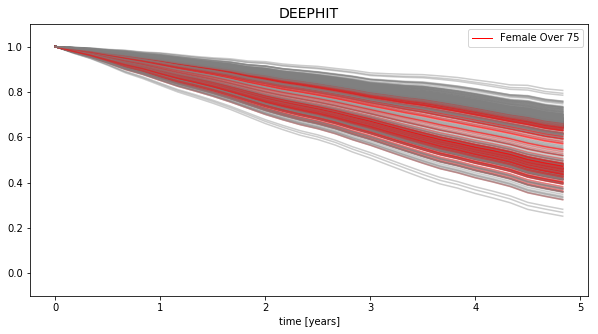

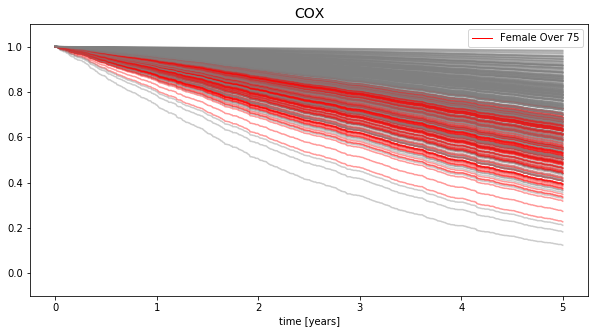

In [20]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

In [21]:
def col(x):
    return 'red' if x['sex'] == 'F' and x['age_in'] <= 75 else 'grey'

colors = ['red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Female Under 75']

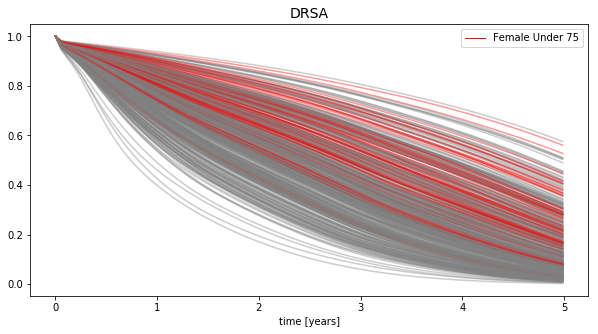

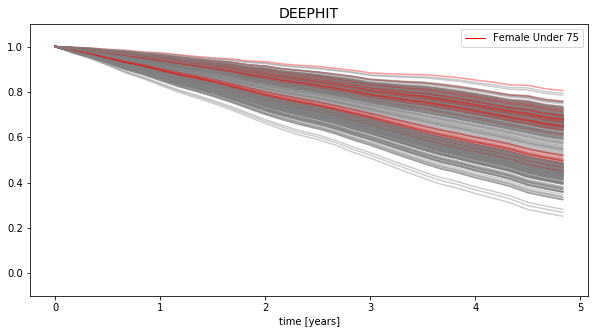

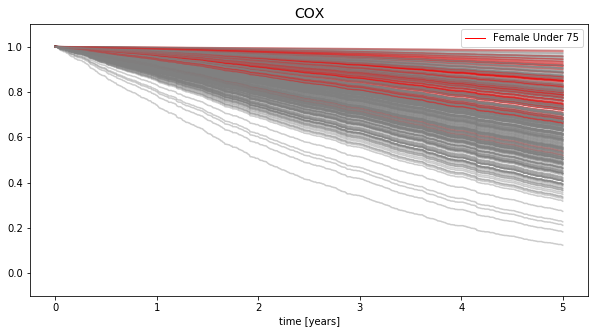

In [22]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

In [23]:
def col(x):
    return 'red' if x['sex'] == 'M' and x['age_in'] > 75 else 'grey'

colors = ['red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Male Over 75']

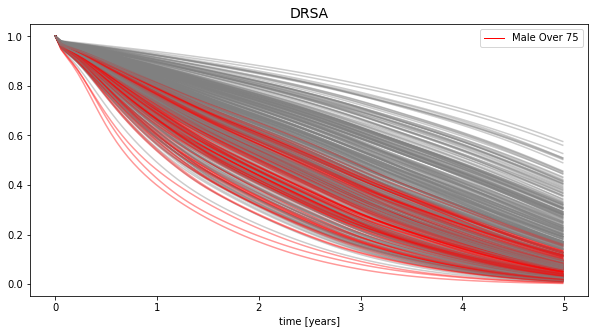

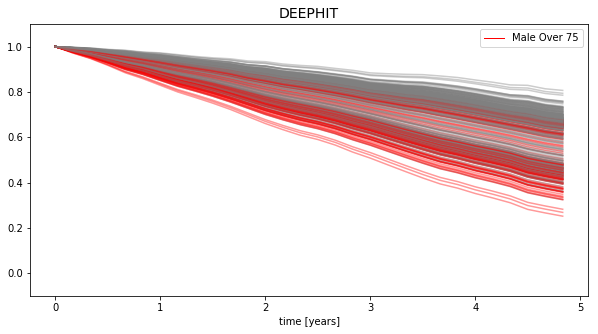

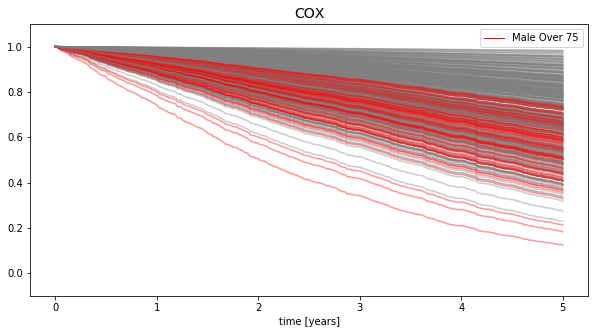

In [24]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

In [25]:
def col(x):
    return 'red' if x['sex'] == 'M' and x['age_in'] <= 75 else 'grey'

colors = ['red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Male Under 75']

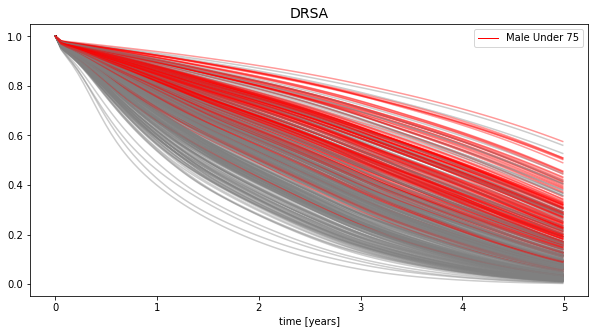

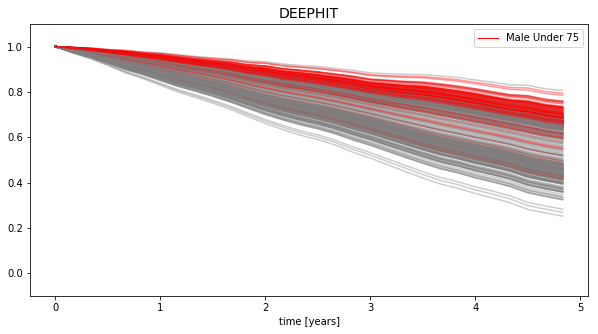

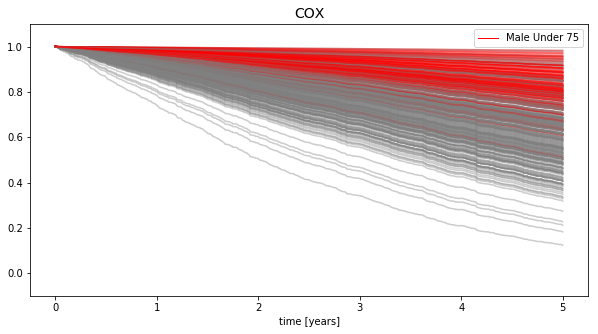

In [26]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

In [27]:
def col(x):
    return 'red' if x['ACE_PC1'] > 0 else 'grey'

colors = ['red']
# for legend
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
labels = ['Positive ACE_PC1']

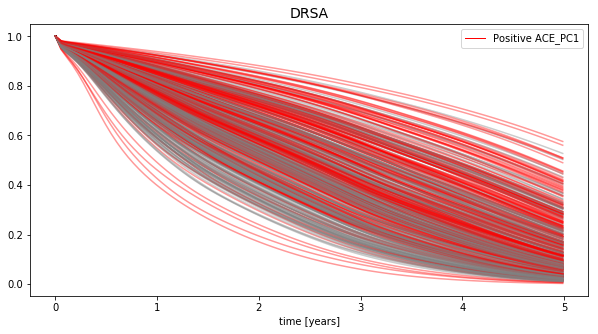

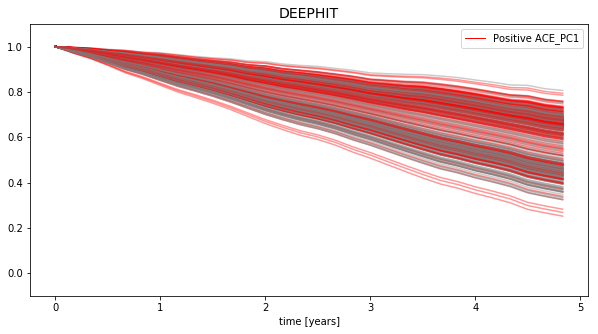

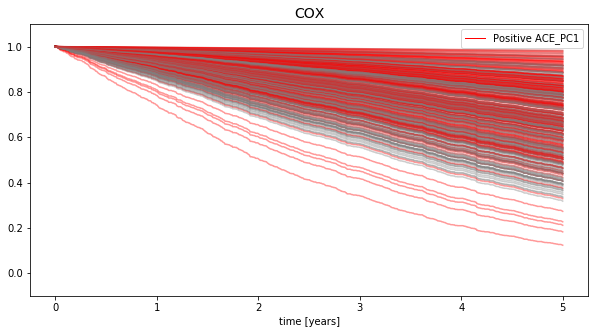

In [28]:
# DRSA
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(drsa_time[drsa_time < time_threshold]),[1]+list(surv_drsa.loc[i,:][drsa_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DRSA',size = 14)
plt.legend(lines, labels)
plt.show()

# DEEPHIT
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot([0]+list(deephit_time[deephit_time < time_threshold]),[1]+list(surv_deephit.loc[i,:][deephit_time < time_threshold]), 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('DEEPHIT',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()

# COX
plt.figure(figsize = (10,5))
for i in sample_ids:
    plt.plot(cox_time[cox_time < time_threshold],surv_cox.loc[i,:][cox_time < time_threshold], 
             color = col(test.loc[i,:]),
             alpha = 0.4,
            )
plt.xlabel('time [years]')
plt.title('COX',size = 14)
plt.ylim(-0.1,1.1)
plt.legend(lines, labels)
plt.show()